In [ ]:
# 1.Data wrangling

In [6]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Sales.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [8]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [9]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dropna(inplace=True)

In [17]:
import numpy as np
df['Sales'].replace(np.nan, df['Sales'].median(), inplace=True)  


In [18]:
df.describe() 

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [20]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.loc[:, 'normalized_Sales'] = scaler.fit_transform(df[['Sales']])

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:,'zscore_Sales'] = scaler.fit_transform(df[['Sales']])

In [30]:
df.loc[:,'Date'] = pd.to_datetime(df['Date'])

In [39]:
assert (df['Sales'] * df['Unit'] == df['total_Sales']).all()  # Ensure total sales match units * price


KeyError: 'total_Sales'

In [31]:
grouped = df.groupby('State')['Sales'].sum()

In [43]:
df.to_csv('Cleaned_Sales.csv', index=False)


In [44]:
df = pd.read_csv('Cleaned_Sales.csv')

In [38]:
print(df.columns)

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'normalized_Sales',
       'zscore_Sales'],
      dtype='object')


In [41]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()  # Summarize sales by state


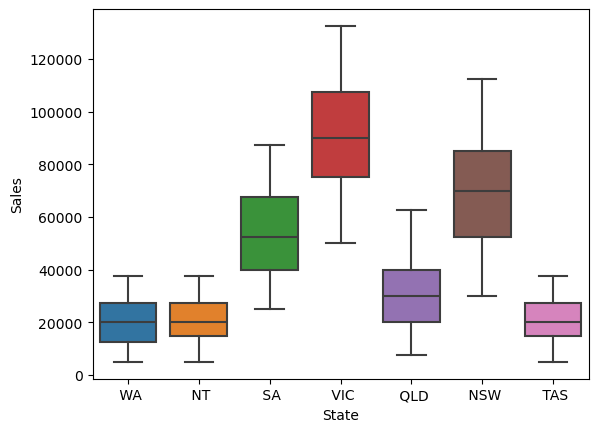

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='State', y='Sales', data=df)
plt.show()

In [48]:
summary_stats = df.describe() # Provides count, mean, std, min, 25%, 50%, 75%, max
print(summary_stats)

              Unit         Sales  normalized_Sales  zscore_Sales
count  7437.000000    7437.00000       7437.000000  7.437000e+03
mean     17.317063   43292.65833          0.300335  9.171992e-17
std      11.826102   29565.25541          0.231884  1.000067e+00
min       2.000000    5000.00000          0.000000 -1.295278e+00
25%       8.000000   20000.00000          0.117647 -7.878919e-01
50%      14.000000   35000.00000          0.235294 -2.805055e-01
75%      25.000000   62500.00000          0.450980  6.497029e-01
max      53.000000  132500.00000          1.000000  3.017506e+00


In [49]:
df.describe()

,Unit,Sales,normalized_Sales,zscore_Sales
count,7437.000000,7437.00000,7437.000000,7.437000e+03
mean,17.317063,43292.65833,0.300335,9.171992e-17
std,11.826102,29565.25541,0.231884,1.000067e+00
min,2.000000,5000.00000,0.000000,-1.295278e+00
25%,8.000000,20000.00000,0.117647,-7.878919e-01
50%,14.000000,35000.00000,0.235294,-2.805055e-01
75%,25.000000,62500.00000,0.450980,6.497029e-01
max,53.000000,132500.00000,1.000000,3.017506e+00


In [51]:
# Mean
mean_sales = df['Sales'].mean()

# Median
median_sales = df['Sales'].median()

# Mode
mode_sales = df['Sales'].mode()[0]  

# Standard Deviation
std_sales = df['Sales'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")


Mean Sales: 43292.65832997176
Median Sales: 35000.0
Mode Sales: 22500
Standard Deviation of Sales: 29565.255410371035


In [53]:
# Group by demographic group and state
group_sales = df.groupby(['State' ])['Sales'].sum().reset_index()

# Identify the group with the highest sales
highest_sales_group = group_sales.loc[group_sales['Sales'].idxmax()]

# Identify the group with the lowest sales
lowest_sales_group = group_sales.loc[group_sales['Sales'].idxmin()]

print(f"Group with the Highest Sales: \n{highest_sales_group}")
print(f"Group with the Lowest Sales: \n{lowest_sales_group}")


Group with the Highest Sales: 
State         VIC
Sales    87230000
Name: 5, dtype: object
Group with the Lowest Sales: 
State          WA
Sales    22152500
Name: 6, dtype: object


In [58]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)




                  Unit  Sales  normalized_Sales  zscore_Sales
Unit               1.0    1.0               1.0           1.0
Sales              1.0    1.0               1.0           1.0
normalized_Sales   1.0    1.0               1.0           1.0
zscore_Sales       1.0    1.0               1.0           1.0


In [59]:
# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Weekly sales
weekly_sales = df['Sales'].resample('W').sum()

# Monthly sales
monthly_sales = df['Sales'].resample('M').sum()

# Quarterly sales
quarterly_sales = df['Sales'].resample('Q').sum()

print("Weekly Sales:")
print(weekly_sales)

print("Monthly Sales:")
print(monthly_sales)

print("Quarterly Sales:")
print(quarterly_sales)


Weekly Sales:
Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    26502500
2020-12-13    27505000
2020-12-20    27875000
2020-12-27    26147500
2021-01-03    12000000
Freq: W-SUN, Name: Sales, dtype: int64
Monthly Sales:
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    116995000
Freq: M, Name: Sales, dtype: int64
Quarterly Sales:
Date
2020-12-31    321967500
Freq: Q-DEC, Name: Sales, dtype: int64


In [60]:
summary_report = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation'],
    'Sales': [mean_sales, median_sales, mode_sales, std_sales]
})
print(summary_report)


            Statistic        Sales
0                Mean  43292.65833
1              Median  35000.00000
2                Mode  22500.00000
3  Standard Deviation  29565.25541


In [61]:
# Data Visualization

In [63]:
sns.set(style="whitegrid")


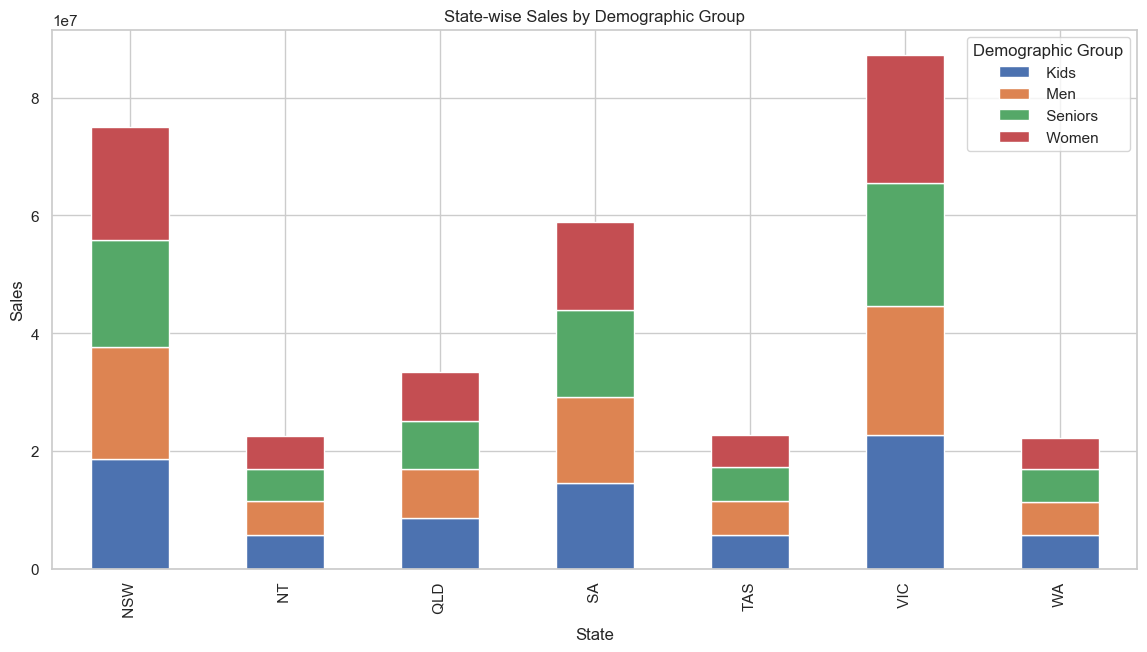

In [69]:
# Group by state and demographic group, then sum the sales
state_demographic_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()

# Create a bar plot
state_demographic_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('State-wise Sales by Demographic Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Demographic Group')
plt.show()


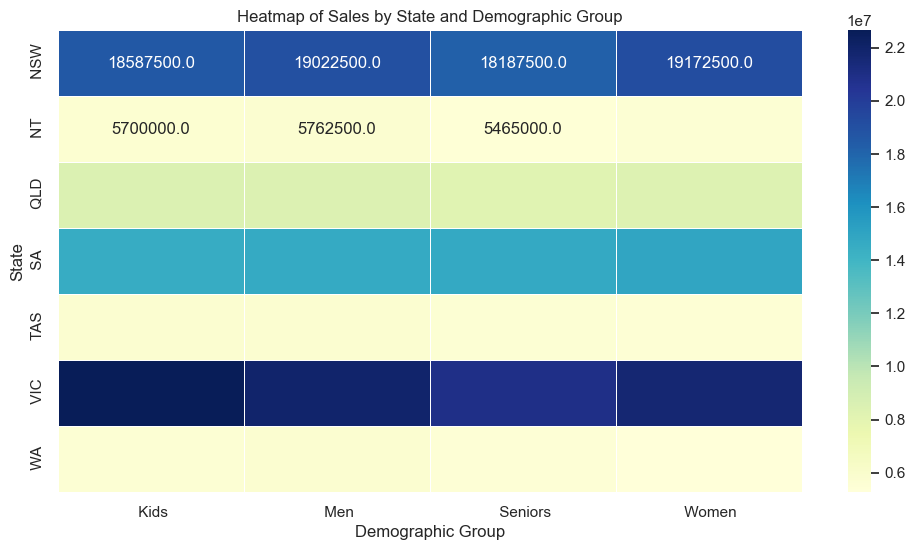

In [70]:
# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(state_demographic_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Sales by State and Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('State')
plt.show()


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


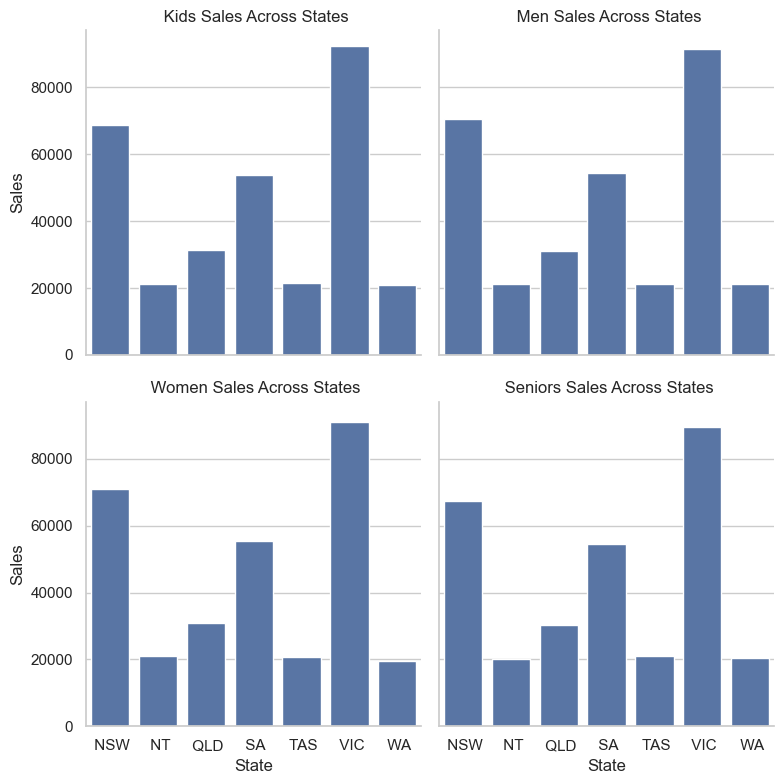

In [72]:
g = sns.FacetGrid(df, col="Group", col_wrap=2, height=4)
g.map(sns.barplot, "State", "Sales", order=sorted(df['State'].unique()), ci=None)
g.set_axis_labels("State", "Sales")
g.set_titles("{col_name} Sales Across States")
plt.show()


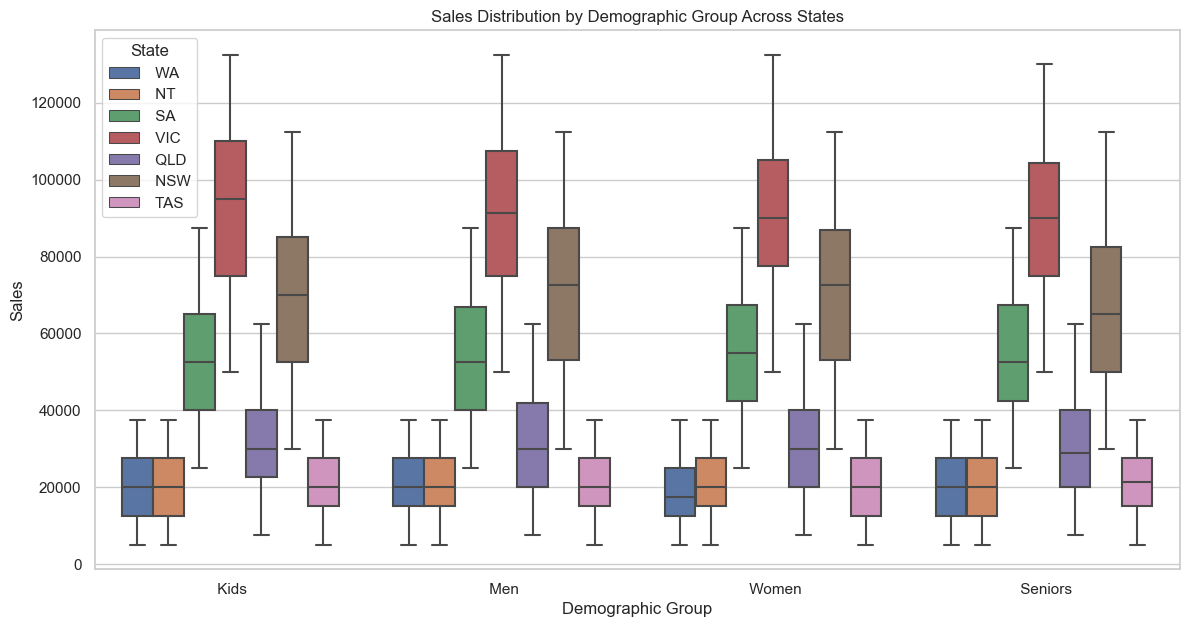

In [74]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Group', y='Sales', hue='State', data=df)
plt.title('Sales Distribution by Demographic Group Across States')
plt.xlabel('Demographic Group')
plt.ylabel('Sales')
plt.show()


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


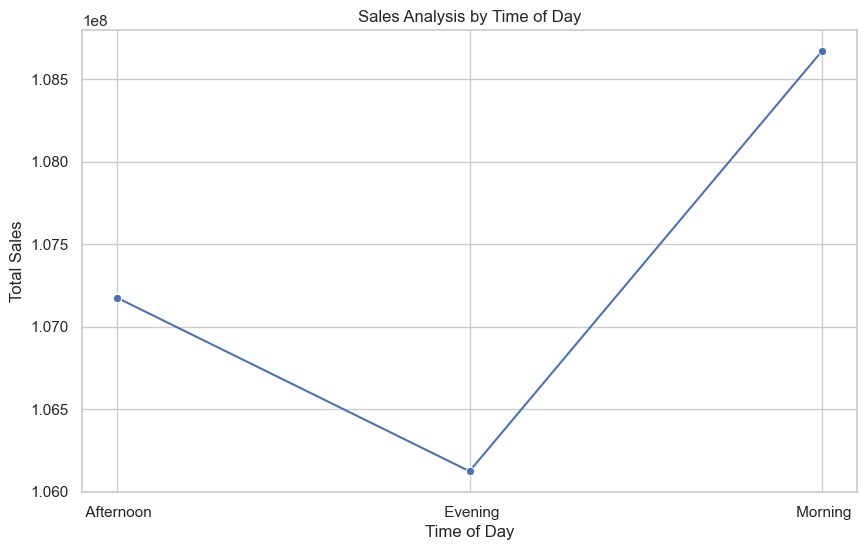

In [80]:
# Assume df has a 'time_of_day' column which categorizes sales times (e.g., Morning, Afternoon, Evening, Night)
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Sales', data=time_sales, marker='o')
plt.title('Sales Analysis by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [76]:
print(df.columns)

Index(['Time', 'State', 'Group', 'Unit', 'Sales', 'normalized_Sales',
       'zscore_Sales'],
      dtype='object')


C:\Users\Dell\AppData\Local\Temp\ipykernel_1708\3150588961.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time', y='Sales', data=df, estimator=np.sum, ci=None, palette="Blues_d")


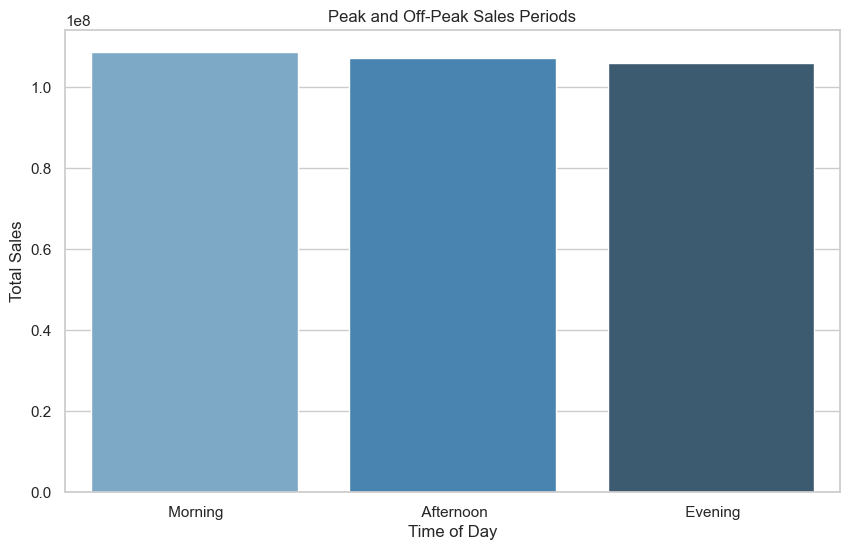

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Sales', data=df, estimator=np.sum, ci=None, palette="Blues_d")
plt.title('Peak and Off-Peak Sales Periods')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()



C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_1708\3125556877.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time', y='Sales', data=df, estimator=np.sum, ci=None, palette="Blues_d", ax=axes[1, 1])


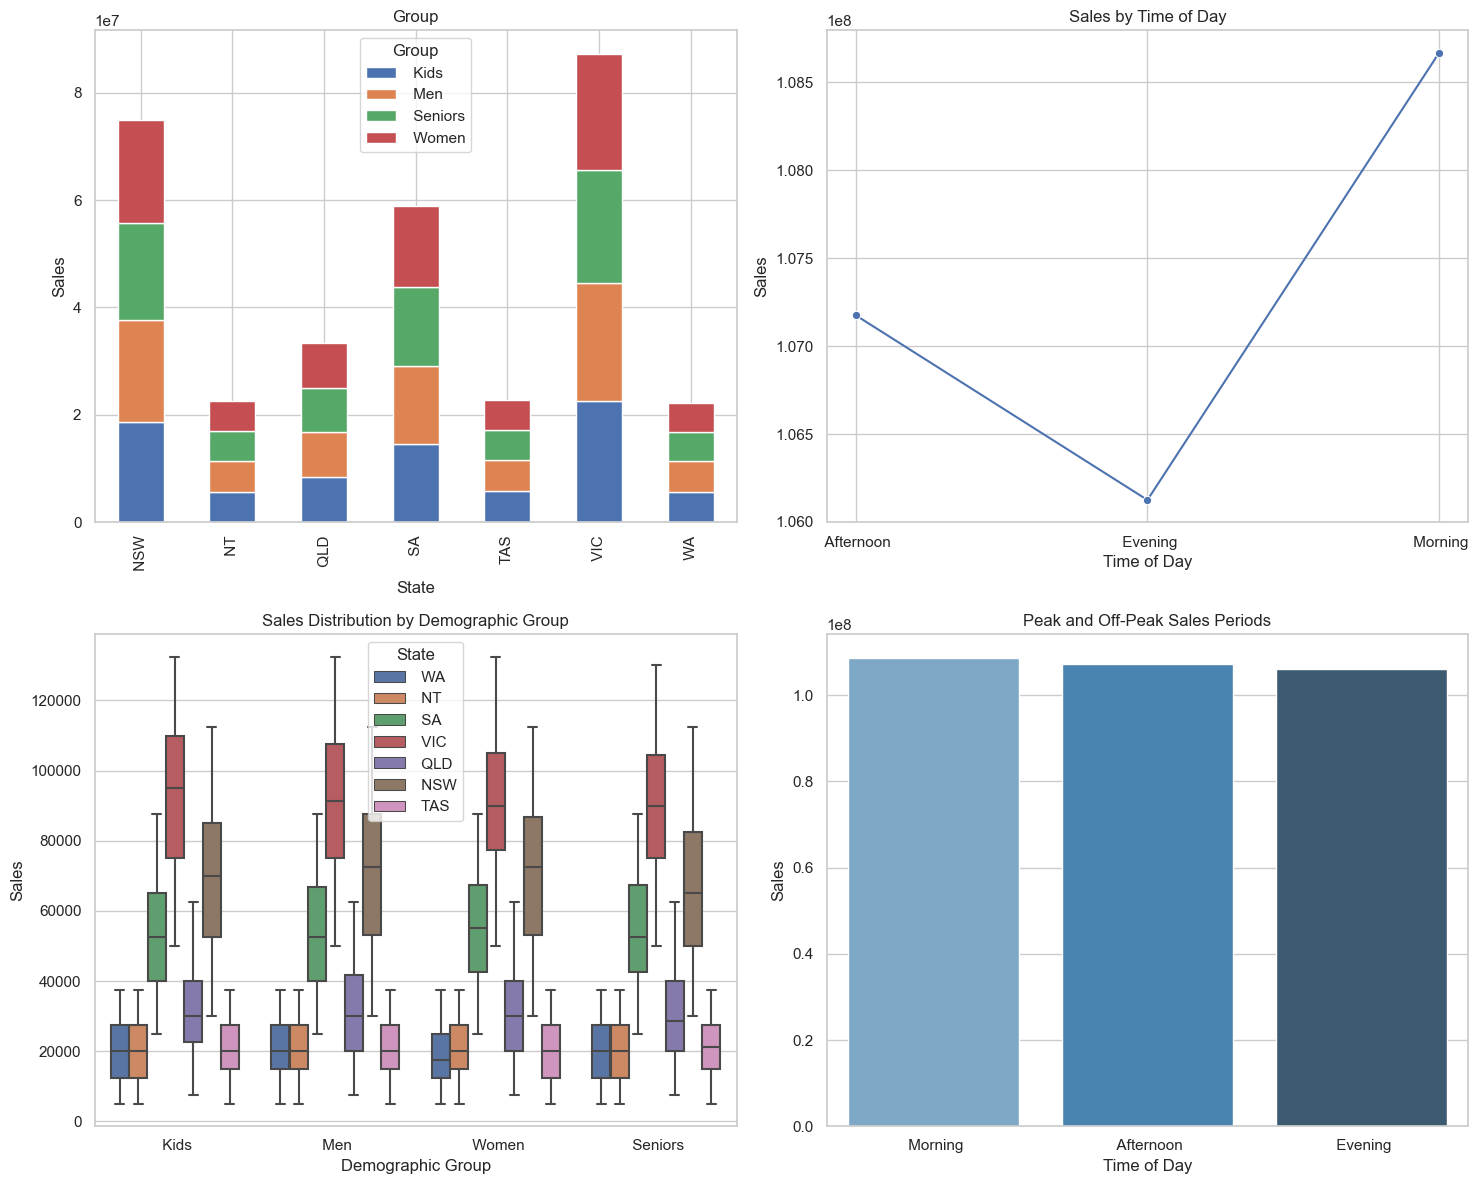

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# State-wise Sales by Demographic Group
state_demographic_sales.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Group')
axes[0, 0].set_xlabel('State')
axes[0, 0].set_ylabel('Sales')

# Sales by Time of Day
sns.lineplot(x='Time', y='Sales', data=time_sales, marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Sales by Time of Day')
axes[0, 1].set_xlabel('Time of Day')
axes[0, 1].set_ylabel('Sales')

# Sales Distribution by Demographic Group Across States
sns.boxplot(x='Group', y='Sales', hue='State', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sales Distribution by Demographic Group')
axes[1, 0].set_xlabel('Demographic Group')
axes[1, 0].set_ylabel('Sales')

# Peak and Off-Peak Sales Periods
sns.barplot(x='Time', y='Sales', data=df, estimator=np.sum, ci=None, palette="Blues_d", ax=axes[1, 1])
axes[1, 1].set_title('Peak and Off-Peak Sales Periods')
axes[1, 1].set_xlabel('Time of Day')
axes[1, 1].set_ylabel('Sales')

plt.tight_layout()
plt.show()


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

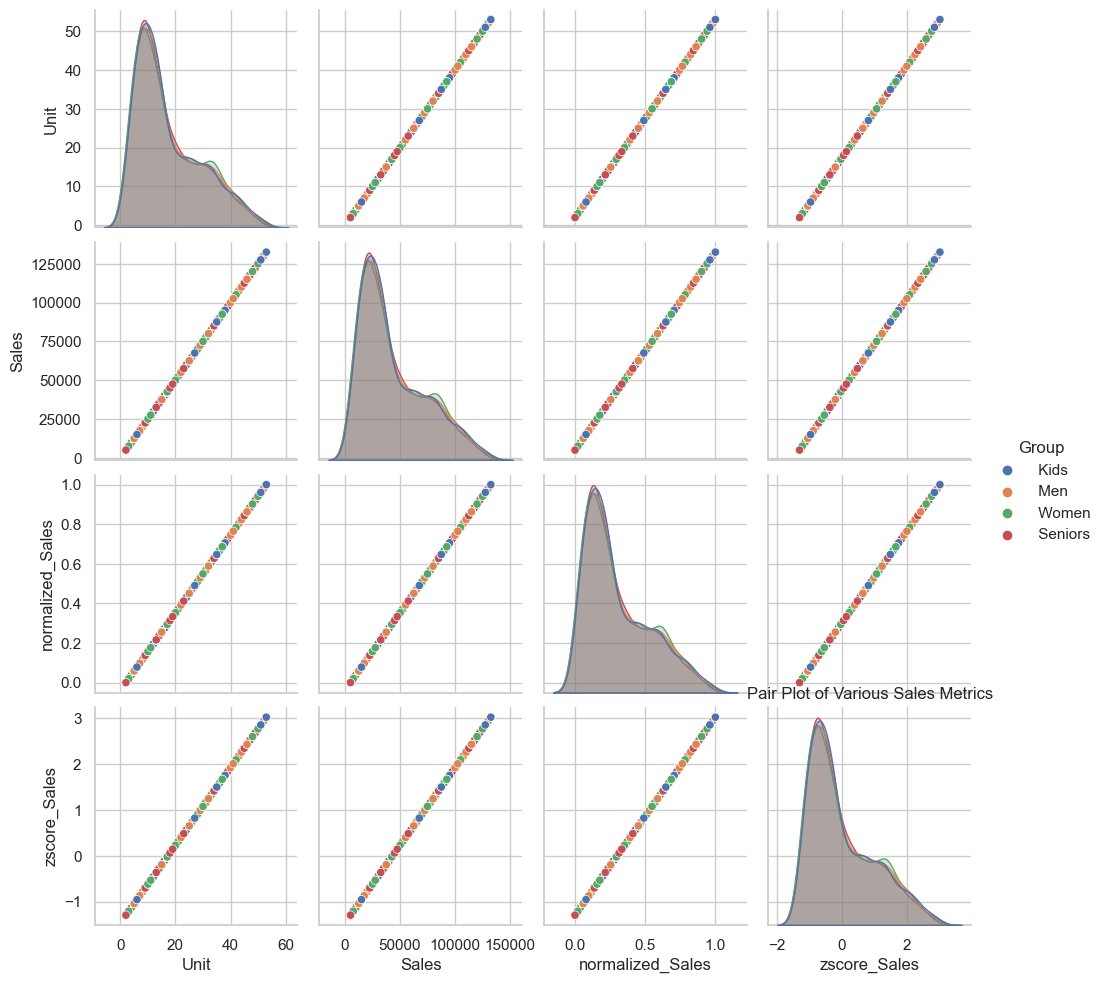

In [84]:
sns.pairplot(df, hue='Group')
plt.title('Pair Plot of Various Sales Metrics')
plt.show()


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


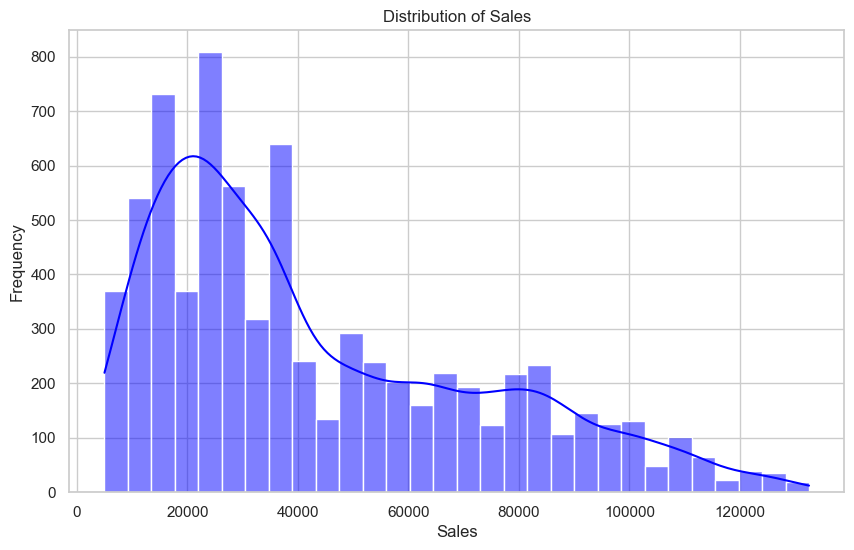

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, color='blue', bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [87]:
fig.savefig('sales_dashboard.png', dpi=300)
